In [1]:
print('hello')

hello


In [2]:
import pandas as pd
import numpy as np

In [3]:
#adding in olympics csv
olympics = pd.read_csv('C:/Users/Colm/Documents/UCDPAColmRyan/Athlete_events.csv')

In [4]:
olympics.head()
olympics.set_index('ID')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN


In [5]:
#are there missing values
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [6]:
#replace missing values with "No medaL" - "NM"
olympics['Medal'].fillna('NM', inplace = True)

In [7]:
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [8]:
#are national committees linked to a unique team?
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [9]:
#add in NOC countries
noc_country = pd.read_csv('C:/Users/Colm/Documents/UCDPAColmRyan/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)
noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [10]:
# merging
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [11]:
# are there NOCs without a matching country in the master?
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [12]:
# Replace Teams
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [13]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [14]:
olympics_merge.set_index('ID') 


,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China
2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NM,Denmark
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NM,Poland
135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NM,Poland
135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NM,Poland


In [15]:
olympics_merge.set_index('ID').index

Int64Index([     1,      2,      3,      4,      5,      5,      5,      5,
                 5,      5,
            ...
            135565, 135566, 135567, 135567, 135568, 135569, 135570, 135570,
            135571, 135571],
           dtype='int64', name='ID', length=271116)

In [16]:
olympics_merge.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
# just some slicing 0-25 alphabetically
olympics_merge[0:25] 

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NM,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NM,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NM,Netherlands
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NM,Netherlands


In [18]:
olympics_labelled = olympics_merge.set_index('ID')

In [19]:
olympics_labelled 


,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China
2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NM,Denmark
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NM,Poland
135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NM,Poland
135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NM,Poland


In [20]:
olympics_labelled.loc['1']

Name                        A Dijiang
Sex                                 M
Age                                24
Height                            180
Weight                             80
NOC                               CHN
Games                     1992 Summer
Year                             1992
Season                         Summer
City                        Barcelona
Sport                      Basketball
Event     Basketball Men's Basketball
Medal                              NM
Team                            China
Name: 1, dtype: object

In [21]:
#olympics in 00's
(olympics['Year'] > 2000) & (olympics['Year'] < 2010)

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115     True
Name: Year, Length: 271116, dtype: bool

In [22]:
noughties = (olympics['Year'] > 2000) & (olympics['Year'] < 2010)

In [23]:
olympics[noughties]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NM
72,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Downhill,NM
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
74,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NM
75,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Slalom,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NM
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NM
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NM


In [24]:
# Adding in country populations for further analysis
world_pop = pd.read_csv('C:/Users/Colm/Documents/UCDPAColmRyan/World_Population.csv')

In [25]:
world_pop.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [26]:
world_pop = pd.melt(world_pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

In [27]:
world_pop['Year'] = pd.to_numeric(world_pop['Year'])

In [28]:
world_pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [29]:
world_pop.rename(columns = {'Country': 'Team'}, inplace = True)

In [30]:
olympics_final = olympics_merge.merge(world_pop,
                                            left_on = ['Team', 'Year'],
                                            right_on= ['Team', 'Year'],
                                            how = 'left')

In [31]:
olympics_final.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China,CHN,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China,CHN,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NM,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands,NLD,1.476009e+07


In [32]:
olympics_final.drop('Country Code', axis = 1, inplace = True)
olympics_final.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NM,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NM,Netherlands,1.476009e+07


In [33]:
#looking for null in populations
olympics_final.isnull().sum()

ID                0
Name              0
Sex               0
Age            9474
Height        60171
Weight        62875
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
Team              0
Population    74821
dtype: int64

In [34]:
# pop begins at 1961 so I'm taking olympics data from that point and for summer olympics only
olympics_final_subset = olympics_final.loc[(olympics_final['Year'] > 1960) & (olympics_final['Season'] == "Summer"), :]

In [35]:
olympics_final_subset.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China,1.350695e+09
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NM,Finland,5.176209e+06
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NM,Finland,5.124573e+06
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NM,Finland,5.176209e+06


In [36]:
# Creating a column that shows if a medal was won

In [37]:
olympics_final_subset['Medal_Won'] = np.where(olympics_final_subset.loc[:,'Medal'] == 'NM', 0, 1)

<ipython-input-37-ef2b5c5b769b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics_final_subset['Medal_Won'] = np.where(olympics_final_subset.loc[:,'Medal'] == 'NM', 0, 1)


In [38]:
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns

<AxesSubplot:xlabel='Height', ylabel='Weight'>

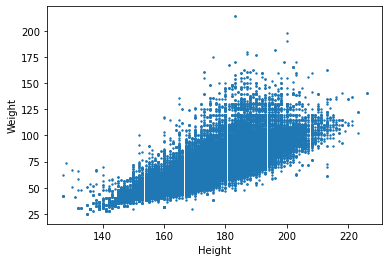

In [40]:
olympics_final_subset.plot.scatter('Height', 'Weight', s=2)

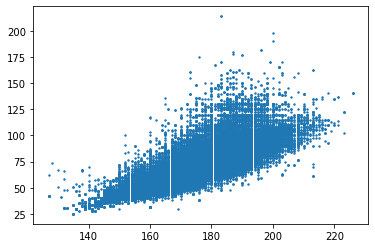

In [41]:
plt.scatter(olympics_final_subset['Height'], olympics_final_subset['Weight'], s=2)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

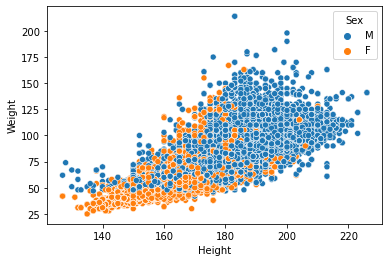

In [42]:
sns.scatterplot(data=olympics_final_subset, x='Height', y='Weight', hue='Sex')

In [43]:
olympics_final_subset.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Population,Medal_Won
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NM,China,1.164970e+09,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NM,China,1.350695e+09,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NM,Finland,5.176209e+06,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NM,Finland,5.124573e+06,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NM,Finland,5.176209e+06,0


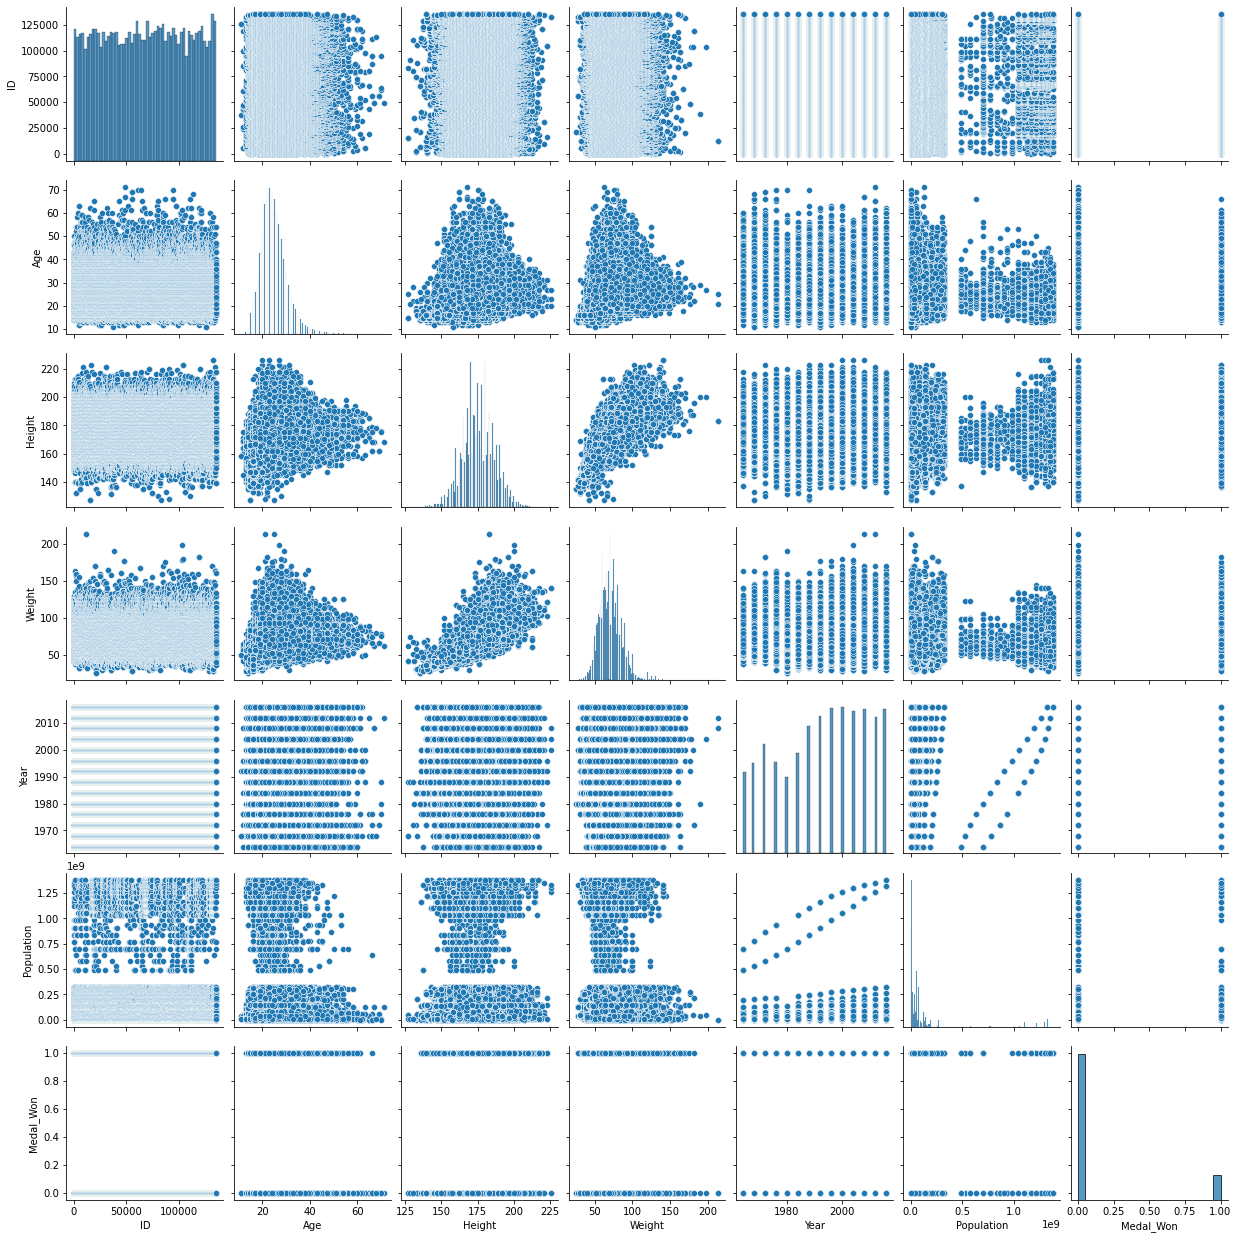

In [44]:
sns.pairplot(olympics_final_subset)

In [45]:
# rows where medal_won is 1
medals = olympics_final_subset['Medal_Won'] == 1

In [46]:
medal_count = olympics_final_subset.groupby(['Year', 'Team', 'Medal'])['Medal_Won'].sum()

In [47]:
print(medal_count)

Year  Team                     Medal 
1964  Afghanistan              NM         0
      Algeria                  NM         0
      Argentina                NM         0
                               Silver     1
      Australia                Bronze    30
                                         ..
2016  Virgin Islands, British  NM         0
      Virgin Islands, US       NM         0
      Yemen                    NM         0
      Zambia                   NM         0
      Zimbabwe                 NM         0
Name: Medal_Won, Length: 4038, dtype: int32


In [48]:
# Medals won
medals_won = olympics_final_subset.groupby(['Year','Team'])['Medal_Won'].sum()

In [49]:
print(medals_won)

Year  Team                   
1964  Afghanistan                 0
      Algeria                     0
      Argentina                   1
      Australia                  44
      Austria                     0
                                 ..
2016  Virgin Islands, British     0
      Virgin Islands, US          0
      Yemen                       0
      Zambia                      0
      Zimbabwe                    0
Name: Medal_Won, Length: 2166, dtype: int32


In [50]:
#host city
olympics_final_subset[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
192,1964,Tokyo
89,1968,Mexico City
90,1972,Munich
145,1976,Montreal
188,1980,Moskva
88,1984,Los Angeles
91,1988,Seoul
0,1992,Barcelona
32,1996,Atlanta
31,2000,Sydney


In [51]:
# Correct city names in the dataset
olympics_final_subset['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)

C:\Users\Colm\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [52]:
# city to country mapping dictionary
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}


In [53]:
# Map cities to countries
olympics_final_subset['Country_Host'] = olympics_final_subset['City'].map(city_to_country)


<ipython-input-53-92aee496b6db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics_final_subset['Country_Host'] = olympics_final_subset['City'].map(city_to_country)


In [54]:
# Extract year, host nation and team name from the data
year_host_team = olympics_final_subset[['Year', 'Country_Host', 'Team']].drop_duplicates()

In [55]:
# check rows where host country is the same as team
row_mask_4 = (year_host_team['Country_Host'] == year_host_team['Team'])

In [56]:
# add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

In [57]:
# Subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

In [58]:
# Calculate the medals won in each year where a team played at home. merge year_host_team with medal_tally on year and team
year_host_team_medal = year_host_team.merge(medals_won,
                                           left_on = ['Year', 'Team'],
                                           right_on = ['Year', 'Team'],
                                           how = 'left')

In [59]:
year_host_team_medal.rename(columns = {'Medal_Won' : 'Medal_Won_Host_Year'}, inplace = True)

In [60]:
# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medals_won,
                                                 left_on = ['Prev_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

In [61]:
year_host_team_medal.rename(columns = {'Medal_Won': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)


In [62]:
# Calculate the medals won by the team the year after they hosted.
year_host_team_medal = year_host_team_medal.merge(medals_won,
                                                 left_on = ['Next_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

In [63]:
year_host_team_medal.rename(columns = {'Year_x': 'Year',
                                       'Medal_Won':'Medal_Won_Next_Year'}, inplace = True)

In [64]:
print(year_host_team_medal)


    Year Country_Host         Team  Prev_Year  Next_Year  Medal_Won_Host_Year  \
0   2004       Greece       Greece       2000       2008                   31   
1   1980       Russia       Russia       1976       1984                  442   
2   1968       Mexico       Mexico       1964       1972                    9   
3   1976       Canada       Canada       1972       1980                   23   
4   2000    Australia    Australia       1996       2004                  183   
5   1972      Germany      Germany       1968       1976                  253   
6   1992        Spain        Spain       1988       1996                   69   
7   2016       Brazil       Brazil       2012       2020                   50   
8   1996          USA          USA       1992       2000                  259   
9   1984          USA          USA       1980       1988                  352   
10  1964        Japan        Japan       1960       1968                   62   
11  2012           UK       

In [65]:
# column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Country_Host', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

In [66]:
year_host_team_medal


,Year,Country_Host,Team,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,2004,Greece,Greece,18.0,31,7.0
1,1980,Russia,Russia,286.0,442,NaN
2,1968,Mexico,Mexico,1.0,9,1.0
3,1976,Canada,Canada,11.0,23,NaN
4,2000,Australia,Australia,132.0,183,157.0
5,1972,Germany,Germany,103.0,253,273.0
6,1992,Spain,Spain,5.0,69,66.0
7,2016,Brazil,Brazil,59.0,50,NaN
8,1996,USA,USA,224.0,259,242.0
9,1984,USA,USA,NaN,352,207.0


In [67]:
# olympics_final_subset: rows with all attribute details (No NaN values) (excluding Medal)
olympics_final_subset1 = olympics_final_subset[np.isfinite(olympics_final_subset['Age'])]
olympics_final_subset1 = olympics_final_subset1[np.isfinite(olympics_final_subset1['Weight'])]
olympics_final_subset1 = olympics_final_subset1[np.isfinite(olympics_final_subset1['Height'])]
olympics_final_subset1.describe()

,ID,Age,Height,Weight,Year,Population,Medal_Won
count,149874.000000,149874.000000,149874.00000,149874.000000,149874.000000,1.406510e+05,149874.000000
mean,68258.774831,25.029185,175.66664,70.702130,1993.121502,1.039743e+08,0.148051
std,39178.981943,5.644679,11.12301,15.072649,15.797479,2.358766e+08,0.355152
min,1.000000,11.000000,127.00000,25.000000,1964.000000,1.003300e+04,0.000000
25%,34389.250000,21.000000,168.00000,60.000000,1980.000000,1.019710e+07,0.000000
50%,68741.000000,24.000000,175.00000,70.000000,1996.000000,3.794802e+07,0.000000
75%,101910.000000,28.000000,183.00000,80.000000,2008.000000,8.062460e+07,0.000000
max,135568.000000,71.000000,226.00000,214.000000,2016.000000,1.378665e+09,1.000000


In [68]:
meanAge = # Sorting data by year from 1896 to 2016
dataByYear= data.sort_values("Year")
dataByYear.head()1["Age"].mean()
meanHeight = olympics_final_subset1["Height"].mean()
meanWeight = olympics_final_subset1["Weight"].mean()
print(" Average Age of Athletes: ",meanAge)
print(" Average Height of Athletes: ",meanHeight)
print(" Average Weight of Athletes: ",meanWeight)

SyntaxError: invalid syntax (<ipython-input-68-f0dd328404ee>, line 1)

In [ ]:
# Sorting data by year from 1896 to 2016
dataByYear= olympics_final_subset.sort_values("Year")
dataByYear.head()

In [ ]:
print("Total Editions:")
print("Season:")
print(olympics_final_subset["Year"].unique())

In [ ]:
print("Total Male & Female Participants:\n",olympics_final_subset["Sex"].value_counts())

In [ ]:
# Gold Medal Winners since 1960
gold_winners= olympics_final_subset[olympics_final_subset["Medal"]=="Gold"]
gold_winners.head()

In [ ]:
# Silver Medal Winners since 1960
silver_winners= olympics_final_subset[olympics_final_subset["Medal"]=="Silver"]
silver_winners.head()

In [ ]:
# Bronze Medal Winners since 1896
bronze_winners= olympics_final_subset[olympics_final_subset["Medal"]=="Bronze"]
bronze_winners.head()

In [ ]:
#top athletes by medals
# Drop NaN values from Medal Column
top_athlete_medals = olympics_final_subset.dropna(subset=['Medal'])
top_athlete_medals.head()

In [ ]:
# Save top 5 medal winners
gwa = gold_winners['Name'].value_counts().sort_values(ascending=True)[-5:]
swa = silver_winners['Name'].value_counts().sort_values(ascending=True)[-5:]
bwa = bronze_winners['Name'].value_counts().sort_values(ascending=True)[-5:]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Plotting with Horizontal View
plt.subplots(figsize=(18,24))
ax1 =plt.subplot(311)
gwa.plot.barh(width=.7)
ax2 = plt.subplot(312, sharex=ax1)
swa.plot.barh(width=.7)
ax3 = plt.subplot(313, sharex=ax1)
bwa.plot.barh(width=.7)

ax3.set_xlabel('Medal Count')
ax1.set_ylabel('Athletes')
plt.show()

In [ ]:
# Get Gender Count
sex_cnt= olympics_final_subset.groupby(['Year','Sex']).size().reset_index(name='Count')
sex_cnt.head()

In [ ]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Summer Olympics",fontsize=20)

sns.pointplot(x="Year", y="Count", hue="Sex", data=sex_cnt, ax= ax_s)
plt.show()

In [ ]:
male_df = olympics_final_subset[olympics_final_subset.Sex=='M']
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(
  ['min','max','mean'])

sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)[:5]

In [ ]:
sns.histplot(sport_weight_height_metrics.Weight.dropna()['mean'])

In [ ]:
means = list(sport_weight_height_metrics.Weight.dropna()['mean'])
sports = list(sport_weight_height_metrics.Weight.dropna().index)
plot_data = sorted(zip(sports, means), key = lambda x:x[1])
plot_data_dict = {
    'x' : [i for i, _ in enumerate(plot_data)],
    'y' : [v[1] for i, v in enumerate(plot_data)],
    'group' :  [v[0] for i, v in enumerate(plot_data)]
}
sns.scatterplot(data = plot_data_dict, x = 'x' , y = 'y')

In [ ]:
print('lightest:')
for sport,weight in plot_data[:5]:
    print(sport + ': ' + str(weight))

print('\nheaviest:')    
for sport,weight in plot_data[-5:]:
    print(sport + ': ' + str(weight))

In [ ]:
print('shortest:')
for sport,height in plot_data[:5]:
    print(sport + ': ' + str(height))

print('\ntallest:')    
for sport,height in plot_data[-5:]:
    print(sport + ': ' + str(height))

In [ ]:
mean_heights = sport_weight_height_metrics.Height.dropna()['mean']
mean_weights = sport_weight_height_metrics.Weight.dropna()['mean']
avg_build = mean_weights/mean_heights
avg_build.sort_values(ascending = True)
builds = list(avg_build.sort_values(ascending = True))

plot_dict = {'x':[i for i,_ in enumerate(builds)],'y':builds}
sns.lineplot(data=plot_dict, x='x', y='y')

In [ ]:
sns.displot(olympics_final_subset['Height'].dropna())

In [ ]:
# Changing the figure size using pyplot
f, ax = plt.subplots(figsize=(15,5))
sns.displot(olympics_final_subset['Weight'].dropna())

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
# Setting a color for plot
sns.displot(olympics_final_subset['Weight'].dropna(), bins=50, kde=False, color="g")

In [ ]:
# A different kind of plot to compare two continuous variables
sns.jointplot(x="Weight", y="Height", data=olympics_final_subset)

In [ ]:
# Pairplot
sns.pairplot(olympics_final_subset.dropna(), height=4)

In [ ]:
# Representing a third dimension color in a pairplot
sns.pairplot(olympics_final_subset.dropna(), hue="Medal")

In [ ]:
# Representing correlations between various features in the data as a heatmap
corrmat = olympics_final_subset.dropna().corr()
f, ax = plt.subplots(figsize=(10,10))
# annot controls annotations, square=True outputs squares as correlation representing figures, cmap represents color map
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="summer")

In [ ]:
# How many unique sports are there?
olympics_final_subset['Sport'].unique()